In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
names=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
      'lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured',
      'T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes']

In [3]:
df=pd.read_csv('allhypo.data',names=names,na_values='?')

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [6]:
df.classes.value_counts()

negative.|3633               1
negative.|844                1
negative.|1552               1
primary hypothyroid.|3505    1
negative.|299                1
                            ..
negative.|2309               1
negative.|1006               1
negative.|2922               1
negative.|274                1
primary hypothyroid.|2299    1
Name: classes, Length: 2800, dtype: int64

In [7]:
df.isnull().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
classes       

In [8]:
df[['first','final']]=df.classes.str.split('.',expand=True)
data=df.drop(['classes','final'],axis=1)

In [9]:
final_data=data.rename(columns={'first':'classes'})
final_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [11]:
final_data.shape

(2800, 30)

In [73]:
data.to_csv('Thyroid_Data.csv')

In [12]:
final_data=final_data.drop('TBG',axis=1)

In [13]:
final_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


In [14]:
#extracting categorical feature
categorical_variable=[feature for feature in final_data.columns if 
                  final_data[feature].dtypes != 'float']

In [15]:
 categorical_variable

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'referral_source',
 'classes']

In [16]:
for feature in  categorical_variable:
     print('---------------------------------')
     print("{}: {}% missing values".format(feature,np.round(final_data[feature].isnull().mean(),4)))

---------------------------------
sex: 0.0393% missing values
---------------------------------
on_thyroxine: 0.0% missing values
---------------------------------
query_on_thyroxine: 0.0% missing values
---------------------------------
on_antithyroid_medication: 0.0% missing values
---------------------------------
sick: 0.0% missing values
---------------------------------
pregnant: 0.0% missing values
---------------------------------
thyroid_surgery: 0.0% missing values
---------------------------------
I131_treatment: 0.0% missing values
---------------------------------
query_hypothyroid: 0.0% missing values
---------------------------------
query_hyperthyroid: 0.0% missing values
---------------------------------
lithium: 0.0% missing values
---------------------------------
goitre: 0.0% missing values
---------------------------------
tumor: 0.0% missing values
---------------------------------
hypopituitary: 0.0% missing values
---------------------------------
psych: 0.0% mi

C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sagar\anaconda3\python\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


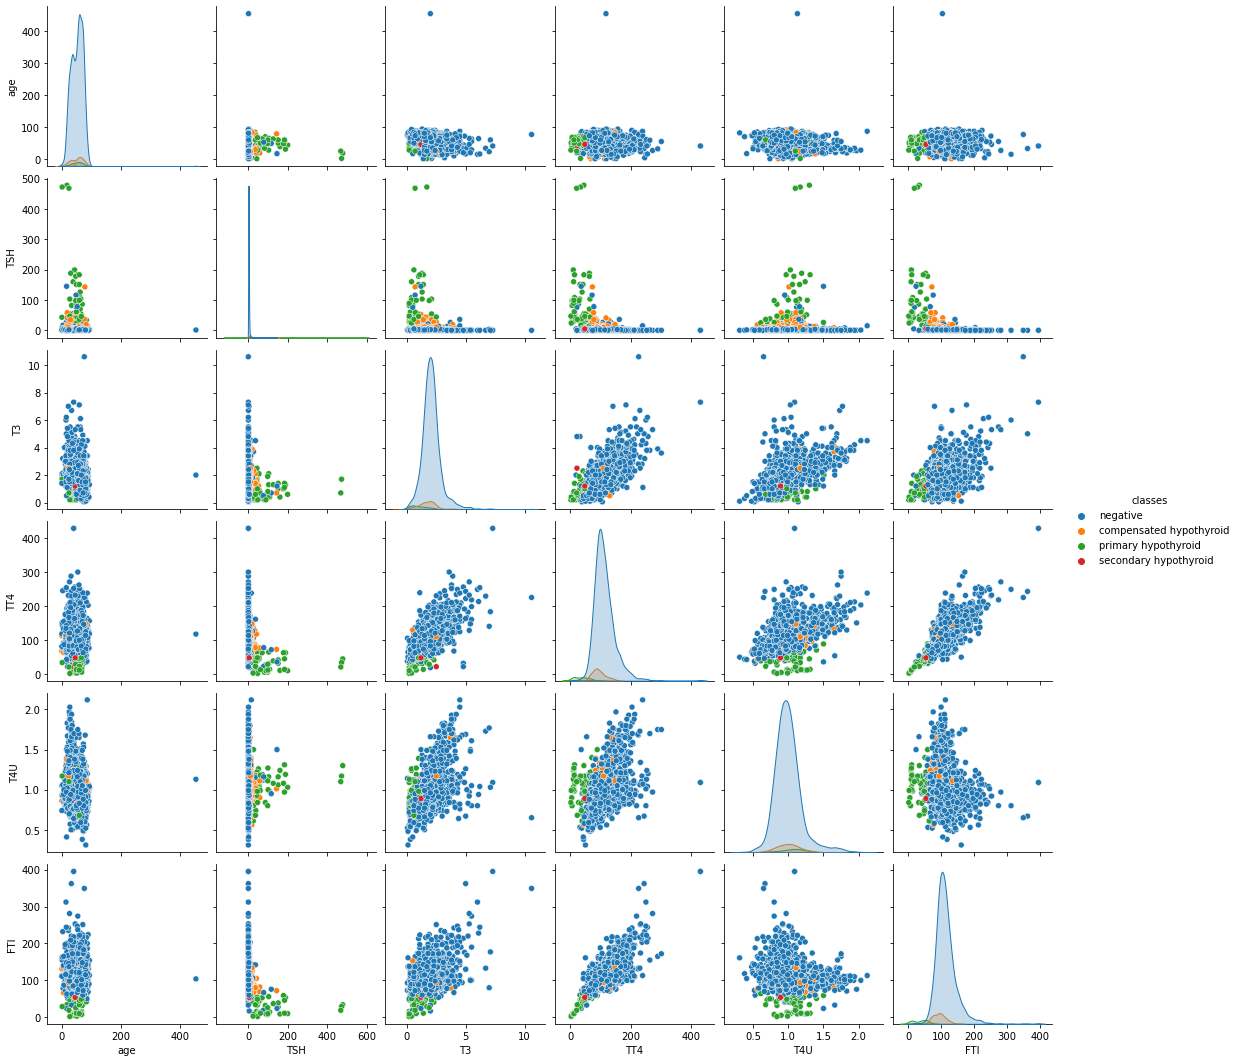

In [17]:
import seaborn as sns
sns.pairplot(final_data,hue='classes')

<AxesSubplot:xlabel='classes', ylabel='FTI'>

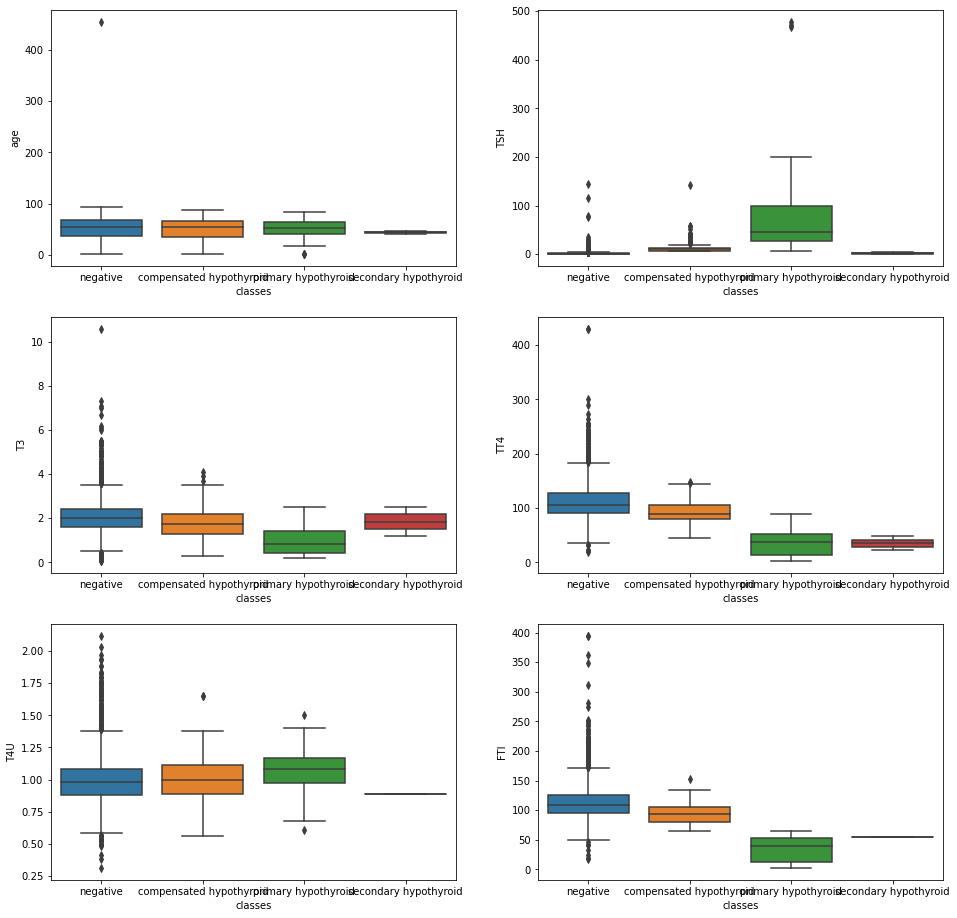

In [18]:
fig, axes = plt.subplots(3,2, figsize=(16, 16))

sns.boxplot(ax=axes[0, 0], data=final_data, x='classes', y='age')
sns.boxplot(ax=axes[0, 1], data=final_data, x='classes', y='TSH')
sns.boxplot(ax=axes[1, 0], data=final_data, x='classes', y='T3')
sns.boxplot(ax=axes[1, 1], data=final_data, x='classes', y='TT4')
sns.boxplot(ax=axes[2, 0], data=final_data, x='classes', y='T4U')
sns.boxplot(ax=axes[2, 1], data=final_data, x='classes', y='FTI')

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
simple_imputer=SimpleImputer(strategy='mean')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(final_data.select_dtypes(exclude='O')))

cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(final_data.select_dtypes(exclude='number')))

numerical_missing.columns=final_data.select_dtypes(exclude='O').columns
categorical_missing.columns=final_data.select_dtypes(exclude='number').columns

new_data=pd.concat([numerical_missing,categorical_missing],axis=1)

In [21]:
new_data.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.500000,125.0,1.140000,109.000000,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.000000,102.0,0.997912,110.787984,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.024966,109.0,0.910000,120.000000,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.900000,175.0,0.997912,110.787984,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.200000,61.0,0.870000,70.000000,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [22]:
new_data.isnull().sum()

age                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
TBG_measured                 0
referral_source              0
classes                      0
dtype: int64

In [23]:
new_data.shape

(2800, 29)

In [24]:
new_data=new_data.drop(new_data.age.index[1364])

In [25]:
new_data.shape

(2799, 29)

In [26]:
def outlier(numerical_missing):
    for columns in numerical_missing:
        sort=np.sort(numerical_missing[columns])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detect_outlier=numerical_missing.iloc[np.where((numerical_missing[columns]>upper_limit) | (numerical_missing[columns]
                                                                                                   <lower_limit))]
        return  detect_outlier
        

In [27]:
outlier_data=outlier(new_data)
outlier_data

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
7,80.0,2.20,0.600000,80.0,0.70,115.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
10,84.0,1.10,2.200000,115.0,0.95,121.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
18,80.0,6.00,1.600000,99.0,0.95,104.0,F,f,f,f,...,f,t,t,t,t,t,t,f,SVI,negative
22,81.0,1.90,0.300000,102.0,0.96,106.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
34,85.0,7.30,2.400000,66.0,1.09,61.0,F,f,f,f,...,f,f,t,t,t,t,t,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,84.0,3.60,0.600000,82.0,0.74,110.0,M,f,f,f,...,f,t,t,t,t,t,t,f,SVI,negative
2774,82.0,2.20,1.000000,68.0,0.77,88.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2783,82.0,0.50,2.024966,125.0,0.84,149.0,F,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
2793,82.0,0.03,1.400000,74.0,0.52,143.0,F,f,f,f,...,f,f,t,t,t,t,t,f,other,negative


In [28]:
new_df=new_data.drop(outlier_data.index)
new_df.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.500000,125.0,1.140000,109.000000,F,f,f,f,...,f,f,t,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.000000,102.0,0.997912,110.787984,F,f,f,f,...,f,f,t,t,t,f,f,f,other,negative
2,46.0,0.98,2.024966,109.0,0.910000,120.000000,M,f,f,f,...,f,f,t,f,t,t,t,f,other,negative
3,70.0,0.16,1.900000,175.0,0.997912,110.787984,F,t,f,f,...,f,f,t,t,t,f,f,f,other,negative
4,70.0,0.72,1.200000,61.0,0.870000,70.000000,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative


In [29]:
new_df.shape

(2666, 29)

In [30]:
new_df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured', 'referral_source', 'classes'],
      dtype='object')

In [31]:
new_df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [32]:
new_df.to_csv('Preprocessed_thyroid_data.csv',index=False)

In [33]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:, -1]

In [34]:
#splitting the dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2132, 28)
(534, 28)
(2132,)
(534,)


In [37]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
#Encode the independent variable
ordinal_encoder = OrdinalEncoder()
x_train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(x_train.select_dtypes(exclude='number')))
x_train_cat_encoded.columns = x_train.select_dtypes(exclude='number').columns

In [40]:
x_test_cat_encoded = pd.DataFrame(ordinal_encoder.transform(x_test.select_dtypes(exclude='number')))
x_test_cat_encoded.columns = x_test.select_dtypes(exclude='number').columns

In [41]:
#Encode the dependent vRiable

label_encoder = LabelEncoder()
y_train_cat_encoded= pd.DataFrame(label_encoder.fit_transform(y_train))
print(y_train_cat_encoded.value_counts())
print(y_train.value_counts())

1    1963
0     120
2      47
3       2
dtype: int64
negative                   1963
compensated hypothyroid     120
primary hypothyroid          47
secondary hypothyroid         2
Name: classes, dtype: int64


In [42]:
y_test_cat_encoded = pd.DataFrame(label_encoder.transform(y_test))

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_sc=pd.DataFrame(sc.fit_transform(x_train.select_dtypes(exclude='O')))
x_test_sc=pd.DataFrame(sc.transform(x_test.select_dtypes(exclude='O')))

x_train_sc.columns=x_train.select_dtypes(exclude='O').columns
x_test_sc.columns=x_test.select_dtypes(exclude='O').columns

In [45]:
x_train_final=pd.concat([x_train_sc,x_train_cat_encoded],axis=1)

x_test_final=pd.concat([x_test_sc,x_test_cat_encoded],axis=1)

In [50]:
x_train_final.head()


,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,1.221624,0.053580,-0.868659,-0.076090,0.385938,-0.342437,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
1,-1.055282,-0.143012,0.324192,-0.595108,1.229451,-1.221124,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
2,0.333076,-0.187011,-0.471042,0.125751,-0.626277,0.536251,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
3,-0.166733,-0.210883,2.974972,2.288328,0.385938,2.042572,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0
4,0.499678,-0.147693,-0.338503,1.077285,0.610875,0.661778,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0


In [51]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [52]:
#Handling imbalance dataset
from imblearn.over_sampling import SMOTE

x_train_resample,y_train_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(x_train_final,y_train_cat_encoded)
x_test_resample,y_test_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(x_test_final,y_test_cat_encoded)

x_train_resample.shape,x_test_resample.shape,y_train_resample.shape,y_test_resample.shape


((7852, 28), (1476, 28), (7852, 1), (1476, 1))

In [53]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [56]:
print('Training dataset shape:', x_train_resample.shape, y_train_resample.shape)
print('Testing dataset shape:', x_test_resample.shape, y_test_resample.shape)

y_train_resample_flat = y_train_resample.to_numpy().ravel()
y_test_resample_flat = y_test_resample.to_numpy().ravel()

print('Training dataset shape:', x_train_resample.shape, y_train_resample_flat.shape)
print('Testing dataset shape:', x_test_resample.shape, y_test_resample_flat.shape)

Training dataset shape: (7852, 28) (7852, 1)
Testing dataset shape: (1476, 28) (1476, 1)
Training dataset shape: (7852, 28) (7852,)
Testing dataset shape: (1476, 28) (1476,)


In [58]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(x_train_resample, y_train_resample_flat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   30.7s finished

[2021-10-26 14:16:22] Features: 1/10 -- score: 0.7800542475683871[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   41.8s finished

[2021-10-26 14:17:03] Features: 2/10 -- score: 0.9673965626989178[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   39.5s finished

[2021-10-26 14:17:43] Features: 3/10 -- score: 0.9839535044010266[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [60]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

x_train_new=x_train_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured', 'referral_source']]
x_test_new=x_test_resample[['age','sex','TSH', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'goitre', 'hypopituitary', 'psych', 'T3_measured', 'referral_source']]

['TSH', 'TT4', 'FTI', 'on_thyroxine', 'query_on_thyroxine', 'sick', 'goitre', 'tumor', 'TT4_measured', 'referral_source']


In [62]:
rf_model=rf.fit(x_train_new,y_train_resample_flat)

In [63]:
def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

In [64]:
print_Score(rf_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=True)

Train Result:
Accuracy Score:99.62%
---------------------------------
Classification Report:
                     0            1            2       3  accuracy  \
precision     0.986432     1.000000     0.998474     1.0  0.996179   
recall        1.000000     0.984717     1.000000     1.0  0.996179   
f1-score      0.993170     0.992300     0.999236     1.0  0.996179   
support    1963.000000  1963.000000  1963.000000  1963.0  0.996179   

             macro avg  weighted avg  
precision     0.996227      0.996227  
recall        0.996179      0.996179  
f1-score      0.996176      0.996176  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1963    0    0    0]
 [  27 1933    3    0]
 [   0    0 1963    0]
 [   0    0    0 1963]]



In [66]:
print_Score(rf_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=False)

Test Result:
Accuracy Score:97.15%
---------------------------------
Classification Report:
                    0           1           2  accuracy    macro avg  \
precision    0.921348    1.000000    1.000000  0.971545     0.973783   
recall       1.000000    0.973577    0.941057  0.971545     0.971545   
f1-score     0.959064    0.986612    0.969634  0.971545     0.971770   
support    492.000000  492.000000  492.000000  0.971545  1476.000000   

           weighted avg  
precision      0.973783  
recall         0.971545  
f1-score       0.971770  
support     1476.000000  
---------------------------------
Confusion Matrix:
[[492   0   0]
 [ 13 479   0]
 [ 29   0 463]]



In [68]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

lr_model=lr.fit(x_train_new,y_train_resample_flat)

lr_train_score=print_Score(lr_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=True)
lr_test_score=print_Score(lr_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=False)

Train Result:
Accuracy Score:93.59%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.914255     0.960865     0.884947     0.984947   0.93594   
recall        0.852776     0.950586     0.940397     1.000000   0.93594   
f1-score      0.882446     0.955698     0.911830     0.992417   0.93594   
support    1963.000000  1963.000000  1963.000000  1963.000000   0.93594   

             macro avg  weighted avg  
precision     0.936254      0.936254  
recall        0.935940      0.935940  
f1-score      0.935598      0.935598  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1674   63  222    4]
 [  53 1866   18   26]
 [ 104   13 1846    0]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:90.92%
---------------------------------
Classification Report:
                    0           1          2    3  accuracy    macro avg  \
precision    0.92694

C:\Users\Sagar\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sagar\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sagar\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
## Navie Bayes Classification

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb_model=gnb.fit(x_train_new,y_train_resample_flat)

gnb_train_score=print_Score(gnb_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=True)
gnb_test_score=print_Score(gnb_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=False)

Train Result:
Accuracy Score:68.59%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.478727     0.968208     0.655148     0.939234   0.68594   
recall        0.636271     0.170657     0.936831     1.000000   0.68594   
f1-score      0.546369     0.290169     0.771069     0.968665   0.68594   
support    1963.000000  1963.000000  1963.000000  1963.000000   0.68594   

             macro avg  weighted avg  
precision     0.760329      0.760329  
recall        0.685940      0.685940  
f1-score      0.644068      0.644068  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1249   11  665   38]
 [1266  335  303   59]
 [  94    0 1839   30]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:67.34%
---------------------------------
Classification Report:
                    0           1           2    3  accuracy    macro avg  \
precision    0.5733

C:\Users\Sagar\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sagar\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sagar\anaconda3\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(x_train_new,y_train_resample_flat)

dt_train_score=print_Score(dt_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=True)
dt_test_model=print_Score(dt_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=False)

Train Result:
Accuracy Score:99.90%
---------------------------------
Classification Report:
                     0            1       2            3  accuracy  \
precision     0.996447     0.999489     1.0     1.000000  0.998981   
recall        1.000000     0.996434     1.0     0.999491  0.998981   
f1-score      0.998220     0.997959     1.0     0.999745  0.998981   
support    1963.000000  1963.000000  1963.0  1963.000000  0.998981   

             macro avg  weighted avg  
precision     0.998984      0.998984  
recall        0.998981      0.998981  
f1-score      0.998981      0.998981  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1963    0    0    0]
 [   7 1956    0    0]
 [   0    0 1963    0]
 [   0    1    0 1962]]

Test Result:
Accuracy Score:98.04%
---------------------------------
Classification Report:
                   0           1           2  accuracy    macro avg  \
precision    0.95534    0.987928    1.000000  0.98

In [72]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn_model=knn.fit(x_train_new,y_train_resample_flat)

knn_train_score=print_Score(knn_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=True)
knn_test_score=print_Score(knn_model,x_train_new,x_test_new,y_train_resample_flat,y_test_resample_flat,train=False)

Train Result:
Accuracy Score:98.93%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.964128     0.999468     0.995941     0.998982  0.989302   
recall        0.999491     0.957718     1.000000     1.000000  0.989302   
f1-score      0.981491     0.978148     0.997966     0.999491  0.989302   
support    1963.000000  1963.000000  1963.000000  1963.000000  0.989302   

             macro avg  weighted avg  
precision     0.989630      0.989630  
recall        0.989302      0.989302  
f1-score      0.989274      0.989274  
support    7852.000000   7852.000000  
-----------------------------------
Confusion Matrix:
[[1962    1    0    0]
 [  73 1880    8    2]
 [   0    0 1963    0]
 [   0    0    0 1963]]

Test Result:
Accuracy Score:78.52%
---------------------------------
Classification Report:
                    0           1           2  accuracy    macro avg  \
precision    0.716707   